In [15]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
algorithm:
    0: 加权蒸馏 0.880
    1: 逐个蒸馏 0.850
    2: 服务器交换参数 0.825
    3: 服务器单独训练, 不使用公开数据 0.881
    4: 服务器单独训练，使用公开数据 0.872
model:
    1: CNN
    2: LeNet5
    3: ResNet18
'''

data = {}
algorithms = [0, 1, 2]
for algo in algorithms:
    file_path = f'./res/mnist_model_1_algo_{algo}/alpha_0.1_T_2/server_commu_50_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[algo] = torch.load(file_path, map_location='cpu')

legends = {0: 'algorithm 0', 1: 'algorithm 1', 2: 'algorithm 2', 3: 'algorithm 3', 4: 'algorithm 4'}

print(data.keys())

dict_keys([0, 1, 2])


0.8374873995780945 [0.10090452432632446, 0.10090452432632446, 0.1037185937166214, 0.46562814712524414, 0.5945728421211243, 0.675778865814209, 0.7010050415992737, 0.7198994755744934, 0.7365829348564148, 0.7672361731529236, 0.7616080045700073, 0.7702512741088867, 0.7757788896560669, 0.7809045314788818, 0.7823115587234497, 0.7886431813240051, 0.7906532287597656, 0.7902512550354004, 0.7970854043960571, 0.7994974851608276, 0.7969849109649658, 0.7966834306716919, 0.8018090128898621, 0.798894464969635, 0.8024120330810547, 0.8008040189743042, 0.8034170866012573, 0.8060301542282104, 0.8061306476593018, 0.8061306476593018, 0.8076381683349609, 0.8048241138458252, 0.807336688041687, 0.8084421753883362, 0.8104522228240967, 0.8084421753883362, 0.811356782913208, 0.8111557960510254, 0.8117587566375732, 0.8141708374023438, 0.8128643035888672, 0.815778911113739, 0.8132663369178772, 0.8137688636779785, 0.8133668303489685, 0.8136683106422424, 0.8143718242645264, 0.8126633167266846, 0.8141708374023438, 0.

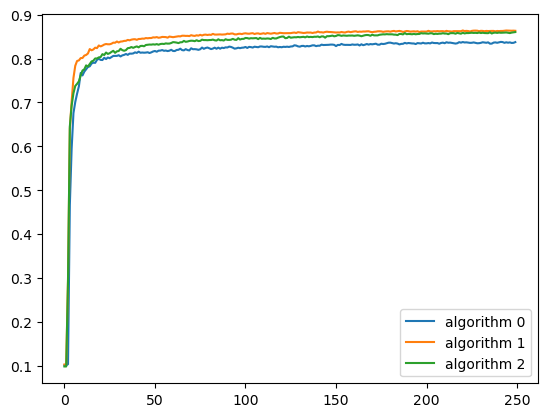

In [16]:
i = 2
for algo in algorithms:
    server_acc = data[algo]['server_acc']
    num_line = len(server_acc[0])
    x = numpy.arange(num_line)
    y = server_acc[i]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.8154438734054565 [0.09969849387804666, 0.09969849387804666, 0.1546398624777794, 0.40797320008277893, 0.5711222688357035, 0.6783919533093771, 0.6997320055961609, 0.7252261241277058, 0.7453266382217407, 0.764422098795573, 0.7589614590009053, 0.7646901210149128, 0.7739698489507039, 0.7735008398691814, 0.7808040181795757, 0.783517559369405, 0.7898492217063904, 0.7882747054100037, 0.7944053411483765, 0.7959129015604656, 0.7958458860715232, 0.7949748833974204, 0.7996649940808613, 0.7990954717000327, 0.8015410304069519, 0.8011725346247356, 0.8020770351092021, 0.8056951562563579, 0.8048911094665527, 0.807336688041687, 0.8055276274681091, 0.8055611252784729, 0.8077386816342671, 0.80927970012029, 0.8105527559916177, 0.8085426886876423, 0.8107537627220154, 0.8108877738316854, 0.8115577697753906, 0.8129648168881733, 0.8133333325386047, 0.8145728707313538, 0.8127973079681396, 0.8135678569475808, 0.815242866675059, 0.8150418599446614, 0.8158458669980366, 0.8154103954633076, 0.8158123890558879, 0.8

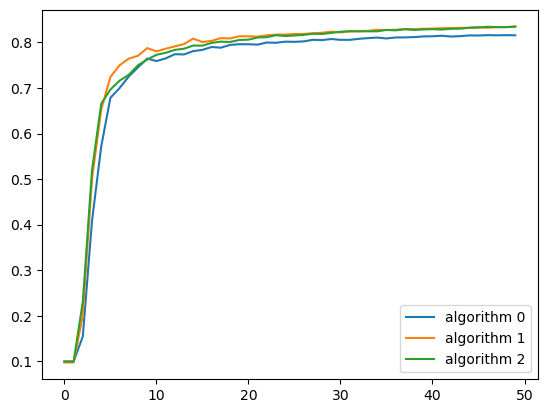

In [17]:
server_acc_mean = {}
num_line = len(data[algo]['server_acc'][0])
for algo in algorithms:
    server_acc_mean[algo] = numpy.zeros(num_line).tolist()
    for i in [0, 1, 2]:
        server_acc = data[algo]['server_acc']
        server_acc_mean[algo] += (numpy.array(server_acc[i]) / numpy.array(len(data[algo]['server_acc'])))
end_point = 50
x = numpy.arange(num_line)[:end_point]
for algo in algorithms:
    y = server_acc_mean[algo][:end_point]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.8329648375511169 [0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.09718593209981918, 0.10562814027070999, 0.14060302078723907, 0.16331657767295837, 0.25628140568733215, 0.25798994302749634, 0.32261306047439575, 0.2985929548740387, 0.37608039379119873, 0.3465326726436615, 0.44301506876945496, 0.4879396855831146, 0.5838190913200378, 0.602512538433075, 0.5472362041473389, 0.6337688565254211, 0.6006029844284058, 0.6504522562026978, 0.6504522562026978, 0.6504522562026978, 0.6504522562026978, 0.6504522562026978, 0.6001005172729492, 0.6120603084564209, 0.5996984839439392, 0.6386934518814087, 0.6536683440208435, 0.6984924674034119, 0.6984924674034119, 0.6984924674034119, 0.6984924674034119, 0.6984924674034119, 0.6775879263877869, 0.6551758646965027, 0.6500502228736877,

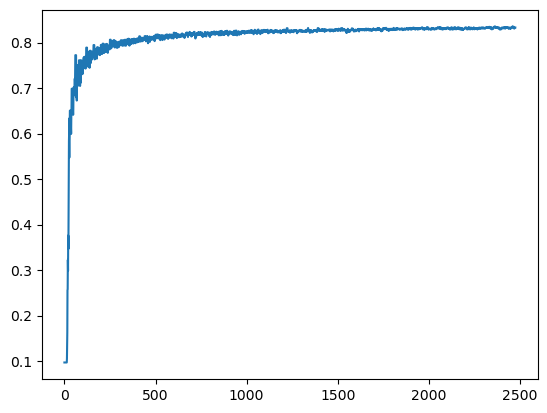

In [18]:
client_acc = data[0]['client_acc']
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 0
y = client_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.03718207776546478 [2.264387845993042, 2.233522891998291, 2.2149417400360107, 2.174222230911255, 2.1560702323913574, 2.130615234375, 2.091942548751831, 2.054988384246826, 1.996870756149292, 1.9431520700454712, 1.899671196937561, 1.79071044921875, 1.7658498287200928, 1.66165292263031, 1.6086126565933228, 1.5144290924072266, 1.4002220630645752, 1.2442973852157593, 1.2994327545166016, 1.0605729818344116, 1.0980651378631592, 1.0195040702819824, 1.1614763736724854, 1.0741653442382812, 0.6768637299537659, 0.9726330041885376, 0.9397642016410828, 0.6556118726730347, 1.0470516681671143, 0.9166356325149536, 1.017119288444519, 0.932956874370575, 0.9317811131477356, 0.8718816637992859, 0.8710612058639526, 1.0297784805297852, 0.9596440196037292, 0.8051042556762695, 0.952674388885498, 0.9788554310798645, 0.8886722326278687, 0.8306905031204224, 0.9144496917724609, 1.0529515743255615, 0.857511043548584, 0.7823020219802856, 0.9820073843002319, 0.9202780723571777, 1.105090618133545, 0.7715732455253601,

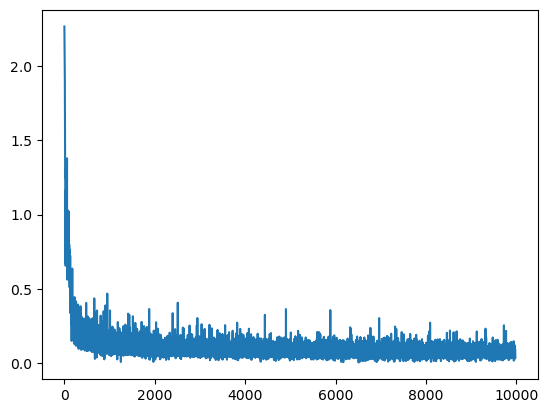

In [19]:
client_loss = data[0]['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 6
y = client_loss[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

[[0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.7849999666213989, 0.7849999666213989, 0.7999999523162842, 0.8100000023841858, 0.8399999737739563, 0.8050000071525574, 0.8399999737739563, 0.8349999785423279, 0.85999995470047, 0.85999995470047, 0.8849999904632568, 0.8899999856948853, 0.8700000047683716, 0.9049999713897705, 0.8899999856948853, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 0.8849999904632568, 0.8899999856948853, 0.8899999856948853, 0.8949999809265137, 0.9049999713897705, 0.8949999809265137, 0.8949999809265137, 0.8949999809265137, 0.8949999809265137, 0.8949999809265137, 0.9049999713897705, 0.9099999666213989, 0.8849999904632568, 0.8949999809265137, 0.8949999809265137, 0.

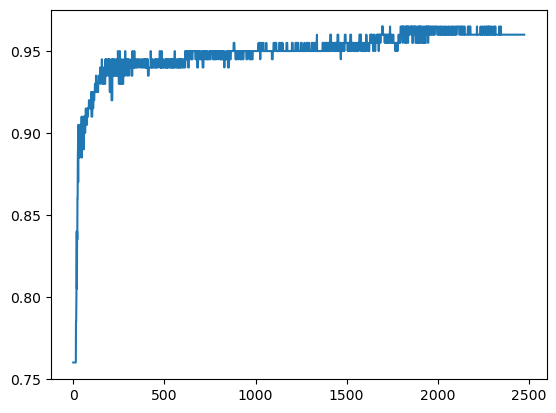

In [20]:
train_acc = data[0]['validate_acc']
print(train_acc)
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 0
y = train_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()